In [1]:
import pandas as pd
import numpy as np
from numpy import newaxis
import random
import itertools
import os
import math
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.collections
from matplotlib import gridspec

from tqdm import *

import keras
from keras.applications import *
import lightgbm as lgbm


Using TensorFlow backend.


In [2]:
from astrohack import *
import astrohack

In [3]:
x = 128+16+4
if x & 16:
    print("a")

a


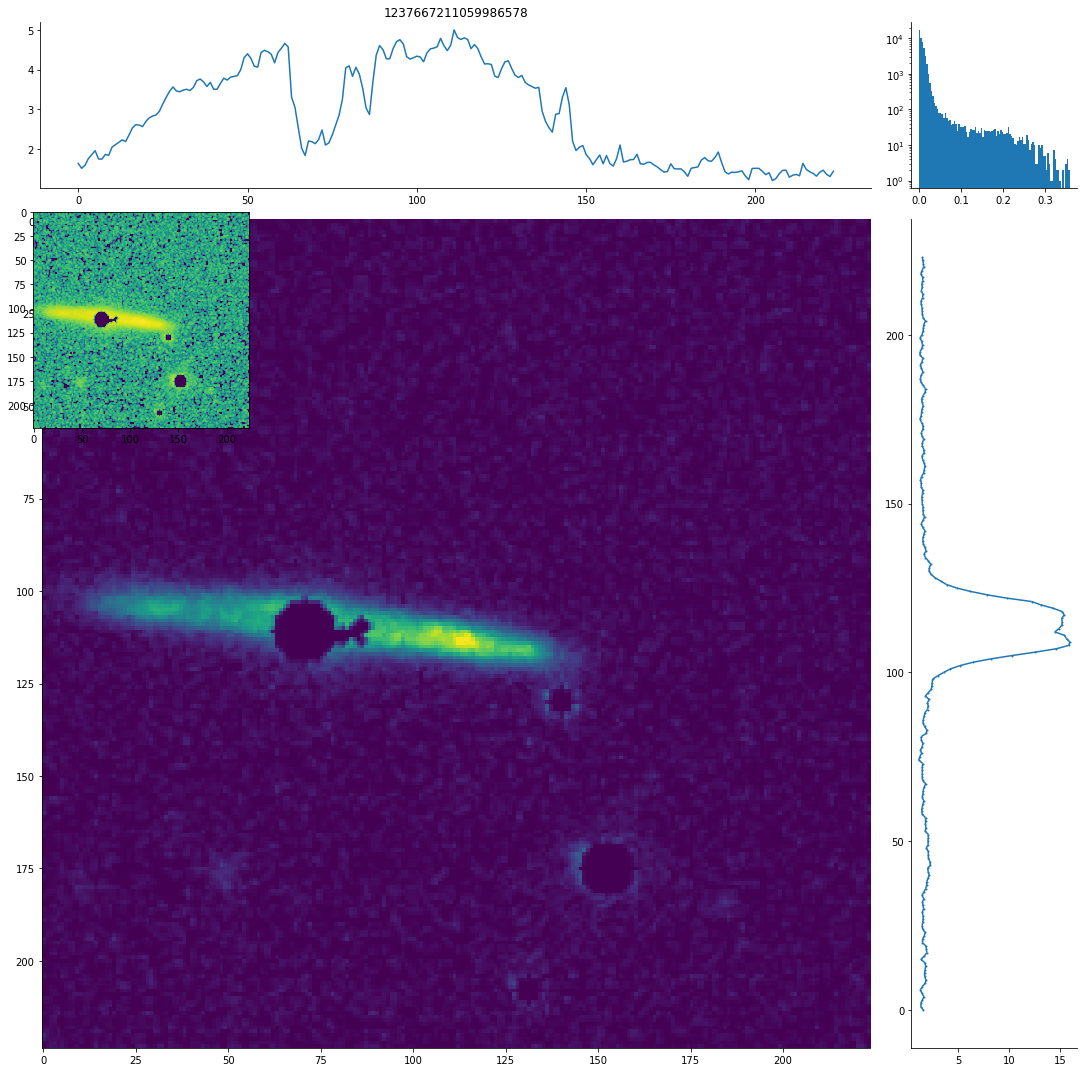

In [5]:
astrohack.dataFolder = 'data/mainData/'
astrohack.dataFolder = 'data/mainData_original/'

X = read_image('1237667211059986578')
X = cleanupImage(X)
X = img_preprocnoread(X, 1) 
X = img_preproc('1237667211059986578',79)
# plt.imshow(img_preproc('1237667211059986578', 16+32+64))
# plt.show()
# 1 for vlip
# 2 for hflip
# 4 for rotate90
# 8 for scale[0,1]
# 16 for log1p
# 32  for normalize ([-mean/std])
# 64 for crop
# 128 hackaton cleanup

drawOneGalaxy(1237667211059986578,128+16+4+2)

# score = xi2(truth, pred, error)



### Read metadata file

In [ ]:
df = getAstrohackDataFrame()

df.head()

In [ ]:
from IPython.display import clear_output

class PlotLosses(keras.callbacks.Callback):
    def __init__(self):
        self.initVars()
    
    def initVars(self):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = [] # self validation
        self.fig = plt.figure()
        self.logs = []
        self.lr = []
        
    def on_train_begin(self, logs={}):
        self.initVars()
        self.referenceLoss = xi2(self.referencePrediction, data[TEST+TRUTH], data[TEST+ERROR])

    def on_epoch_end(self, epoch, logs={}):
        
        self.i += 1
        
        curloss = logs.get('loss')
        self.losses.append(curloss)
        self.val_losses.append(logs.get('val_loss'))
        self.logs.append(logs)
        self.x.append(self.i)
        
        clear_output(wait=True)
        plt.figure(figsize=(6,6))

    def plotLosses(self, ax):
        plt.plot(self.x, self.losses, label="train loss")
        plt.plot(self.x, self.val_losses, label="val loss")
        ax.set_yscale("log", nonposy='clip')
        plt.legend()
        
plot_losses = PlotLosses()